<a href="https://colab.research.google.com/github/suha6194/my-colab-notebooks/blob/main/SCT_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 

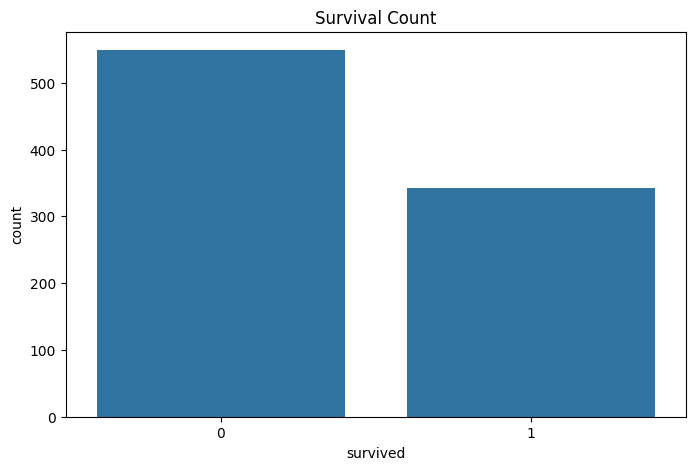

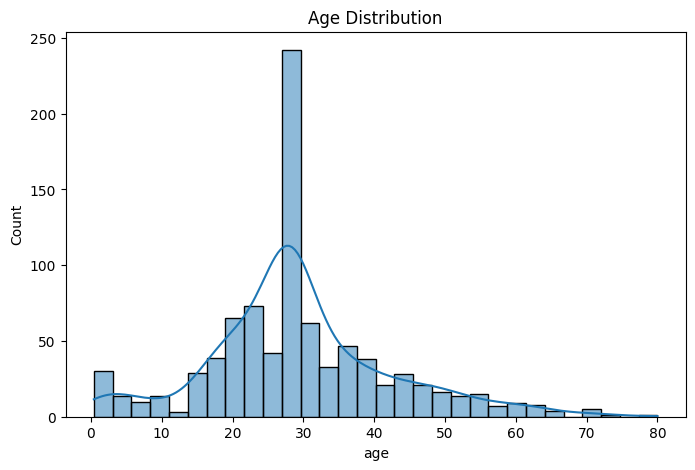

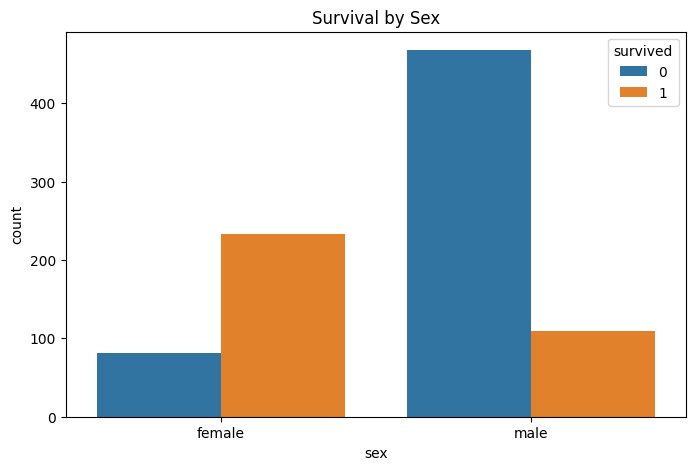

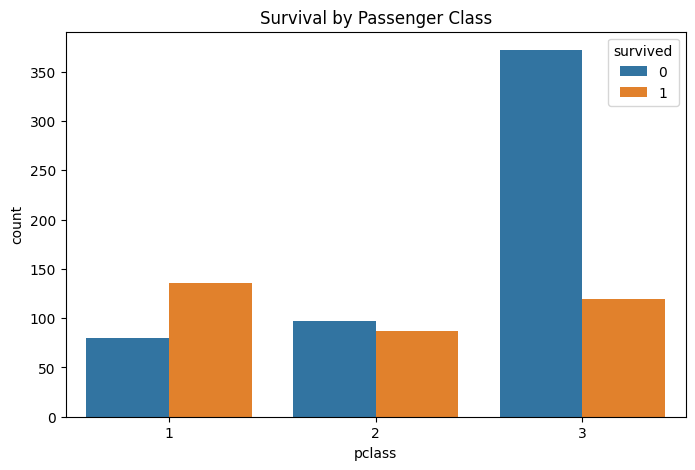

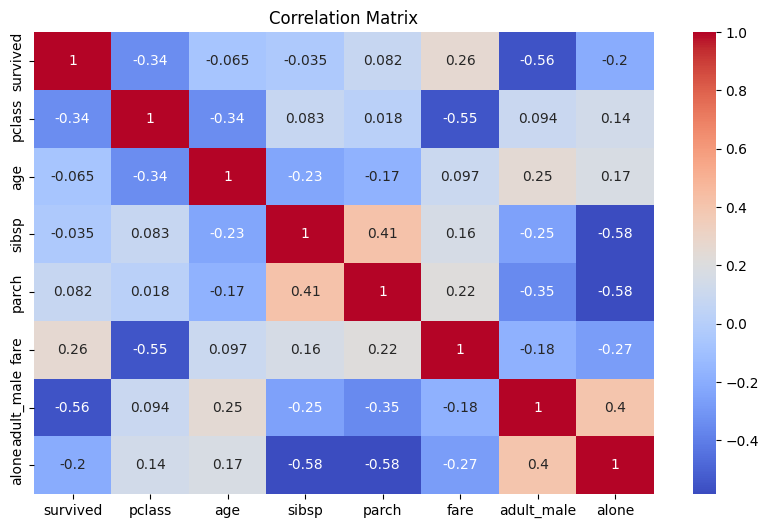

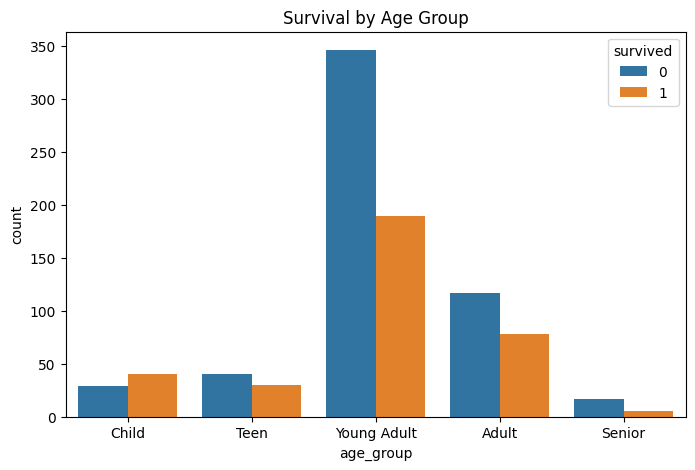


Survival Rate by Sex and Class:
 sex     pclass
female  1         0.97
        2         0.92
        3         0.50
male    1         0.37
        2         0.16
        3         0.14
Name: survived, dtype: float64


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('titanic')

# Display first few rows
print("First 5 rows:\n", df.head())

# Basic info
print("\nData Info:")
print(df.info())

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Data Cleaning

# Fill missing age with median
df['age'] = df['age'].fillna(df['age'].median())

# Fill embark_town and embarked with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop deck due to too many missing values
df = df.drop(columns=['deck'])

# Confirm no more missing values
print("\nMissing After Cleaning:\n", df.isnull().sum())

# Convert categorical variables
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')

# EDA - Univariate Analysis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# EDA - Bivariate Analysis

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Sex')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival by Passenger Class')
plt.show()

# Correlation Heatmap (numerical features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Age Group Survival Analysis
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100],labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='age_group', hue='survived')
plt.title('Survival by Age Group')
plt.show()

# Survival Rate by Sex and Class
print("\nSurvival Rate by Sex and Class:\n",df.groupby(['sex', 'pclass'], observed=True)['survived'].mean().round(2))